# Projeto 4 - Analise de folhas de videira

## Preparação do ambiente
Faça o download e carregue o dataset Grapevine Leaves Image Dataset (https://www.kaggle.com/datasets/muratkokludataset/grapevine-leaves-image-dataset).

Fonte:  
Koklu, M., Unlersen, M. F., Ozkan, I. A., Aslan, M. F., & Sabanci, K. (2022). A CNN-SVM study based on selected deep features for grapevine leaves classification. Measurement, 188, 110425. Doi: https://doi.org/10.1016/j.measurement.2021.110425  

In [ ]:
!git clone https://github.com/aaasatoou/BlueEdTech_M3.git

Cloning into 'BlueEdTech_M3'...
remote: Enumerating objects: 3168, done.
remote: Counting objects: 100% (514/514), done.
remote: Compressing objects: 100% (512/512), done.
remote: Total 3168 (delta 0), reused 514 (delta 0), pack-reused 2654
Receiving objects: 100% (3168/3168), 444.84 MiB | 27.88 MiB/s, done.
Checking out files: 100% (3252/3252), done.


In [ ]:
import os
import numpy as np

from PIL import Image

In [ ]:
Ak_path = '/content/BlueEdTech_M3/Datasets/Grapevine Leaves Image Dataset/Grapevine_Leaves_Image_Dataset/Ak/'
Ala_Idris_path = '/content/BlueEdTech_M3/Datasets/Grapevine Leaves Image Dataset/Grapevine_Leaves_Image_Dataset/Ala_Idris/'
Buzgulu_path = '/content/BlueEdTech_M3/Datasets/Grapevine Leaves Image Dataset/Grapevine_Leaves_Image_Dataset/Buzgulu/'
Dimnit_path = '/content/BlueEdTech_M3/Datasets/Grapevine Leaves Image Dataset/Grapevine_Leaves_Image_Dataset/Dimnit/'
Nazli_path = '/content/BlueEdTech_M3/Datasets/Grapevine Leaves Image Dataset/Grapevine_Leaves_Image_Dataset/Nazli/'

Ak = os.listdir(Ak_path)
Ala_Idris = os.listdir(Ala_Idris_path)
Buzgulu = os.listdir(Buzgulu_path)
Dimnit = os.listdir(Dimnit_path)
Nazli = os.listdir(Nazli_path)

paths = [Ak_path, Ala_Idris_path, Buzgulu_path, Dimnit_path, Nazli_path]
files = [Ak, Ala_Idris, Buzgulu, Dimnit, Nazli]

## Exercícios
### Questão 1) 
Implemente uma rotina de carregamento das imagens (2 pontos)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
img = []
rotulos = []

for i in range(0, len(paths)):
  for j in files[i]:
    img.append(Image.open(paths[i] + j)) # Criação do vetor com as imagens carregadas.
    rotulos.append(paths[i][94:-1]) # Rotulos das imagens.

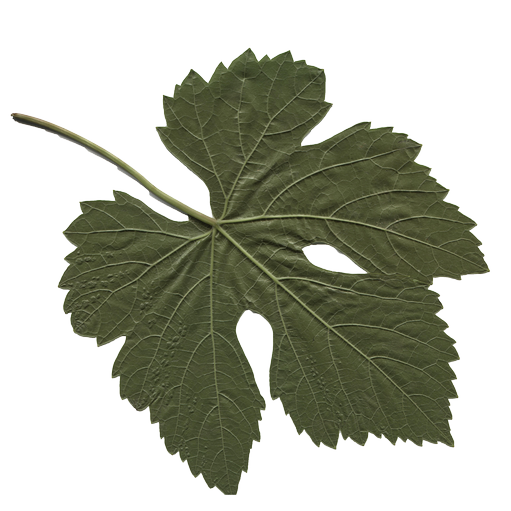

In [ ]:
# Imagens carregadas no vetor 'img'

img[257]

### Questão 2) 
Faça a leitura das imagens e responda (2 pontos):  
a) Qual a resolução das imagens deste dataset? (0,5 ponto)  


In [ ]:
dims = []
for i in range(0, len(paths)):
  for j in files[i]:
    w, h = Image.open(paths[i] + j).size
    dims.append(f"{w}x{h}")

np.unique(dims)

array(['511x511'], dtype='<U7')

A única dimensão presente no dataset é 511 x 511, ou seja, todas as imagens possuem resolução 511 x 511

b) Quantas imagens por classe? (1,0 ponto)  


In [ ]:
for i in files: # Percorre todas as classes, i é uma lista com o nome dos arquivos dentro da pasta de uma classe
  print(len(i))

100
100
100
100
100


Cada classe possui 100 imagens

c) Este dataset já está estruturado em conjuntos treinamento/teste ou deve-se adotar alguma metodologia na modelagem? (0,5 ponto)

O dataset não está estruturado em treino e teste, portanto deve ser divido antes de se aplicar algum modelo. A função train_test_split do sklearn é o suficiente para realizar essa divisão.  

O conjunto será dividido posteriormente.

### Questão 3) 
Faça a preparação do dataset para extração de características com a CNN VGG-19. Qual o formato do input da rede? Verifique se há necessidade de transformação da imagem e, se sim, implemente esta transformação (1 ponto)

O formato padrão da entrada da VGG19, segundo a documentação (https://keras.io/api/applications/vgg/#vgg19-function), é (224x224) em 3 canais (tipicamente, "RGB").  

As imagens carregadas no vetor 'img' precisam ser transformadas para se adequarem ao formato de entrada.

In [ ]:
X = np.empty(shape=(500, 224, 224, 3)) # 500 imagens. 224 x 224 será o tamanho da imagem, em 3 canais (RGB)

for i in range(0,len(img)):
  X[i] = np.array(img[i].convert('RGB').resize(size=(224,224)))

X = X/255 # Valores normalmente de 0 até 255, a normalização os coloca na faixa de 0 até 1

### Questão 4) 
Implemente o processo de extração de características utilizando a VGG-19 e a transformação deste espaço de característica de forma adequada (2 pontos)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19

X_train, X_test, y_train, y_test = train_test_split(X, rotulos, test_size = 0.2, random_state= 95)

model = VGG19(include_top=True, weights='imagenet', input_shape=(224, 224, 3), classes=1000)
model = Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

print('\tFeatures training shape: ', X_train.shape)
print('\tFeatures testing shape: ', X_test.shape)
print('\nFeature extraction...\n')
prediction = np.array(model.predict(X_train))
X_train = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

prediction = np.array(model.predict(X_test))
X_test = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

print('\tNew training shape: ', X_train.shape)
print('\tNew testing shape: ', X_test.shape)

574726144/574710816 [==============================] - 4s 0us/step
	Features training shape:  (400, 224, 224, 3)
	Features testing shape:  (100, 224, 224, 3)

Feature extraction...

	New training shape:  (400, 4096)
	New testing shape:  (100, 4096)


### Questão 5) 
Utilize o espaço de características:  
a) Se o conjunto não estiver particionado, escolha uma técnica e justifique sua decisão. Implemente esta rotina (1 ponto)  

O conjunto foi dividido na **Questão 4**. Como não foi realizado nenhum tipo de treinamento (a rede VGG19 é uma rede já treinada), os dados particionados podem passar separadamente pelo processo de extração de características sem nenhum impacto no resultado. Sendo assim, nesse ponto não há necessidade de aplicação de nenhuma técnica de particionamento.

O principal objetivo dessa divisão é entender o quão bom é o desempenho do modelo quando utilizado em um "novo" conjunto de dados. Esse tipo de abordagem ajuda a entender se o modelo é generalizado ou não. 


b) Utilize os dados com os classificadores Árvores de Decisão e Naive-Bayes. Obtenha a acurácia dos modelos e avalie os resultados (2 pontos).

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=25)
gnb = GaussianNB()
mnb = MultinomialNB()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"Acurácia DT: {accuracy_score(y_test, y_pred)}")
print(f"Precisão DT: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall DT: {recall_score(y_test, y_pred, average='macro'):.4f}\n")

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(f"Acurácia NB: {accuracy_score(y_test, y_pred)}")
print(f"Precisão NB: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall NB: {recall_score(y_test, y_pred, average='macro'):.4f}\n")

mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print(f"Acurácia NB Multinomial: {accuracy_score(y_test, y_pred)}")
print(f"Precisão NB Multinomial: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall NB Multinomial: {recall_score(y_test, y_pred, average='macro'):.4f}")

Acurácia DT: 0.58
Precisão DT: 0.6029
Recall DT: 0.5853

Acurácia NB: 0.56
Precisão NB: 0.5698
Recall NB: 0.5625

Acurácia NB Multinomial: 0.67
Precisão NB Multinomial: 0.7020
Recall NB Multinomial: 0.6768


Os modelos apresentam acurácias parecidas, porém o Naive Bayes Multinomial se destaca. Isso provavelmente acontece porque os dados de entrada são discretos e o Naive Bayes Multinomial tem uma boa performance com esse tipo de dado.  

Ainda há o problema da própria extração de características, são 4096 atributos onde pode haver diversas colunas iguais ou com o valor 0. Para isso, técnicas de redução de dimensionalidade podem trazer uma melhora na performance dos modelos.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=.95, svd_solver='full') # Diminui a dimensão e seleciona as componentes até explicar 95% da variação dos dados
Xtrain_pca = pca.fit_transform(X_train)
Xtest_pca = pca.transform(X_test)

# A saída do PCA pode possuir alguns valores negativos que não serão aceitos no naive bayes multinomial
# MinMaxScaler é utilizado para garantir apenas valores positivos

scaler = MinMaxScaler()
Xtrain_pca = scaler.fit_transform(Xtrain_pca)
Xtest_pca = scaler.transform(Xtest_pca)

In [ ]:
dt.fit(Xtrain_pca, y_train)
y_pred = dt.predict(Xtest_pca)

print(f"Acurácia DT: {accuracy_score(y_test, y_pred)}")
print(f"Precisão DT: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall DT: {recall_score(y_test, y_pred, average='macro'):.4f}\n")

gnb.fit(Xtrain_pca, y_train)
y_pred = gnb.predict(Xtest_pca)

print(f"Acurácia NB: {accuracy_score(y_test, y_pred)}")
print(f"Precisão NB: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall NB: {recall_score(y_test, y_pred, average='macro'):.4f}\n")

mnb.fit(Xtrain_pca, y_train)
y_pred = mnb.predict(Xtest_pca)

print(f"Acurácia NB Multinomial: {accuracy_score(y_test, y_pred)}")
print(f"Precisão NB Multinomial: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall NB Multinomial: {recall_score(y_test, y_pred, average='macro'):.4f}")

Acurácia DT: 0.49
Precisão DT: 0.4822
Recall DT: 0.4941

Acurácia NB: 0.69
Precisão NB: 0.6975
Recall NB: 0.6967

Acurácia NB Multinomial: 0.78
Precisão NB Multinomial: 0.7841
Recall NB Multinomial: 0.7913


Ao reduzir as dimensões do espaço de características, há um aumento notável na performance dos modelos baseados em probabilidade (Naive Bayes e Multinomial Naive Bayes) por conta da redução do ruído presente nos atributos. A árvore de decisão perde performance de forma significativa, provavelmente não é um modelo ideal para esse tipo de problema.

Dessa forma concluímos que entre os dois modelos, os baseados em probabilidade (Naive Bayes e Multinomial Naive Bayes) são melhores para o problema proposto.